In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df=pd.read_csv('C:/Users/Tina/Downloads/marketing_campaign.csv',sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.shape

(2240, 29)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
df=df.dropna()
df.shape

(2216, 29)

In [7]:
df.duplicated().sum()

0

In [8]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [9]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [10]:
df.describe(include=[object])

,Education,Marital_Status,Dt_Customer
count,2216,2216,2216
unique,5,8,662
top,Graduation,Married,31-08-2012
freq,1116,857,12


In [11]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [12]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [13]:
ed_map = { 'Graduation':'Graduation', 'PhD':'Higher', 'Master':'Higher', 'Basic':'Basic', '2n Cycle':'Higher'}
df['Education'] = df['Education'].map(ed_map)

In [14]:
ma_map = {'Single':1, 'Together':2, 'Married':2, 'Divorced':1, 'Widow':1, 'Alone':1,'Absurd':1, 'YOLO':1}
df['Marital_Status']=df['Marital_Status'].map(ma_map)

In [15]:
df['Age']=2025-df['Year_Birth']

In [16]:
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'],format='%d-%m-%Y')

In [17]:
min(df['Year_Birth'])

1893

In [18]:
df['Tenure (Days)']=(pd.to_datetime('today')-df['Dt_Customer']).dt.days

In [19]:
df['Total_Spending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

In [20]:
df['Family Size']= df['Kidhome'] + df['Teenhome']+ df['Marital_Status']

In [21]:
df=df.drop(['Z_CostContact', 'Z_Revenue','ID', 'Year_Birth','Dt_Customer'],axis=1)

In [22]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age', 'Tenure (Days)', 'Total_Spending',
       'Family Size'],
      dtype='object')

In [23]:
df[['Income','Age','Recency','Family Size','Tenure (Days)', 'Total_Spending']].describe()

,Income,Age,Recency,Family Size,Tenure (Days),Total_Spending
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,56.179603,49.012635,2.592509,4246.521209,607.075361
std,25173.076661,11.985554,28.948352,0.905722,202.434667,602.900476
min,1730.000000,29.000000,0.000000,1.000000,3893.000000,5.000000
25%,35303.000000,48.000000,24.000000,2.000000,4073.000000,69.000000
50%,51381.500000,55.000000,49.000000,3.000000,4248.500000,396.500000
75%,68522.000000,66.000000,74.000000,3.000000,4422.000000,1048.000000
max,666666.000000,132.000000,99.000000,5.000000,4592.000000,2525.000000


In [24]:
# Max age is 132
df['Age'].nlargest(5)

239     132
339     126
192     125
1950     85
424      84
Name: Age, dtype: int64

In [25]:
#income has outliers
df['Income'].nlargest(5)

2233    666666.0
617     162397.0
687     160803.0
1300    157733.0
164     157243.0
Name: Income, dtype: float64

In [26]:
df=df[(df['Age']<100)]
df=df[(df['Income']<200000)]

In [27]:
df.shape

(2212, 28)

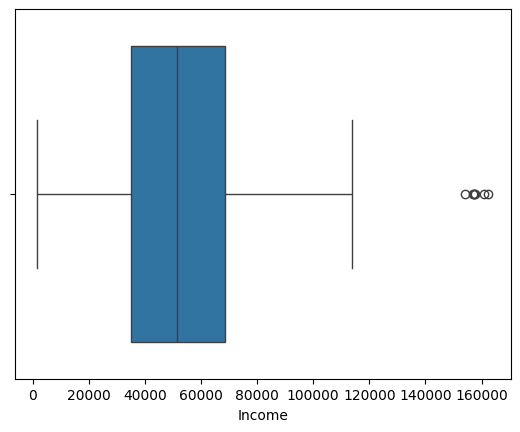

In [28]:
#univariate analysis 

sns.boxplot(x=df['Income'])
plt.show()

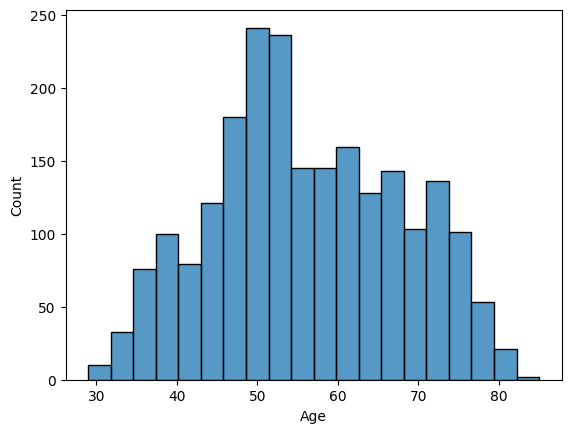

In [29]:
sns.histplot(df['Age'], bins=20)
plt.show()

<Axes: xlabel='Marital_Status'>

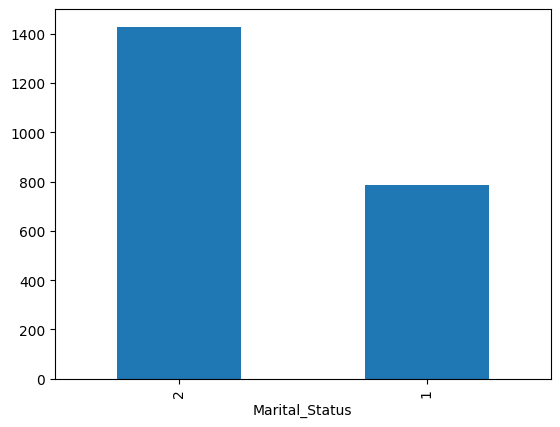

In [30]:
df['Marital_Status'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

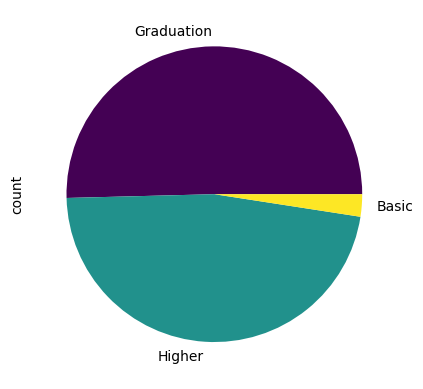

In [31]:
df['Education'].value_counts().plot(kind='pie',cmap='viridis')

<Axes: xlabel='Income', ylabel='Total_Spending'>

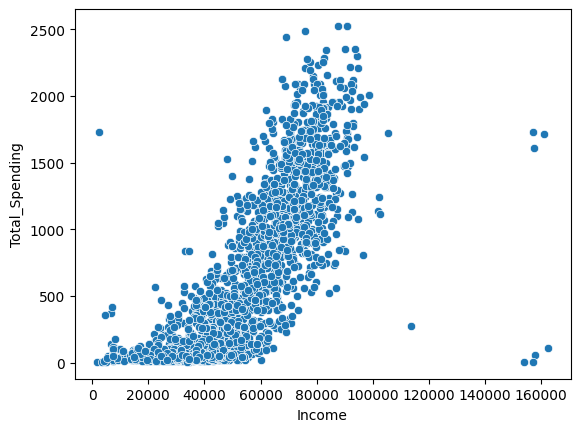

In [32]:
#bivariate analysis

sns.scatterplot(x='Income', y='Total_Spending', data=df)

In [33]:
pd.crosstab(df['Education'], df['Marital_Status'])

Marital_Status,1,2
Education,,
Basic,20,34
Graduation,402,713
Higher,362,681


<Axes: >

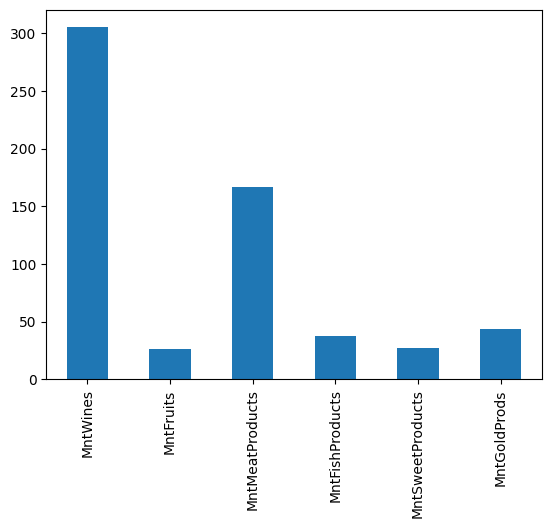

In [34]:
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df[spending_columns].mean().plot(kind='bar')

<Axes: >

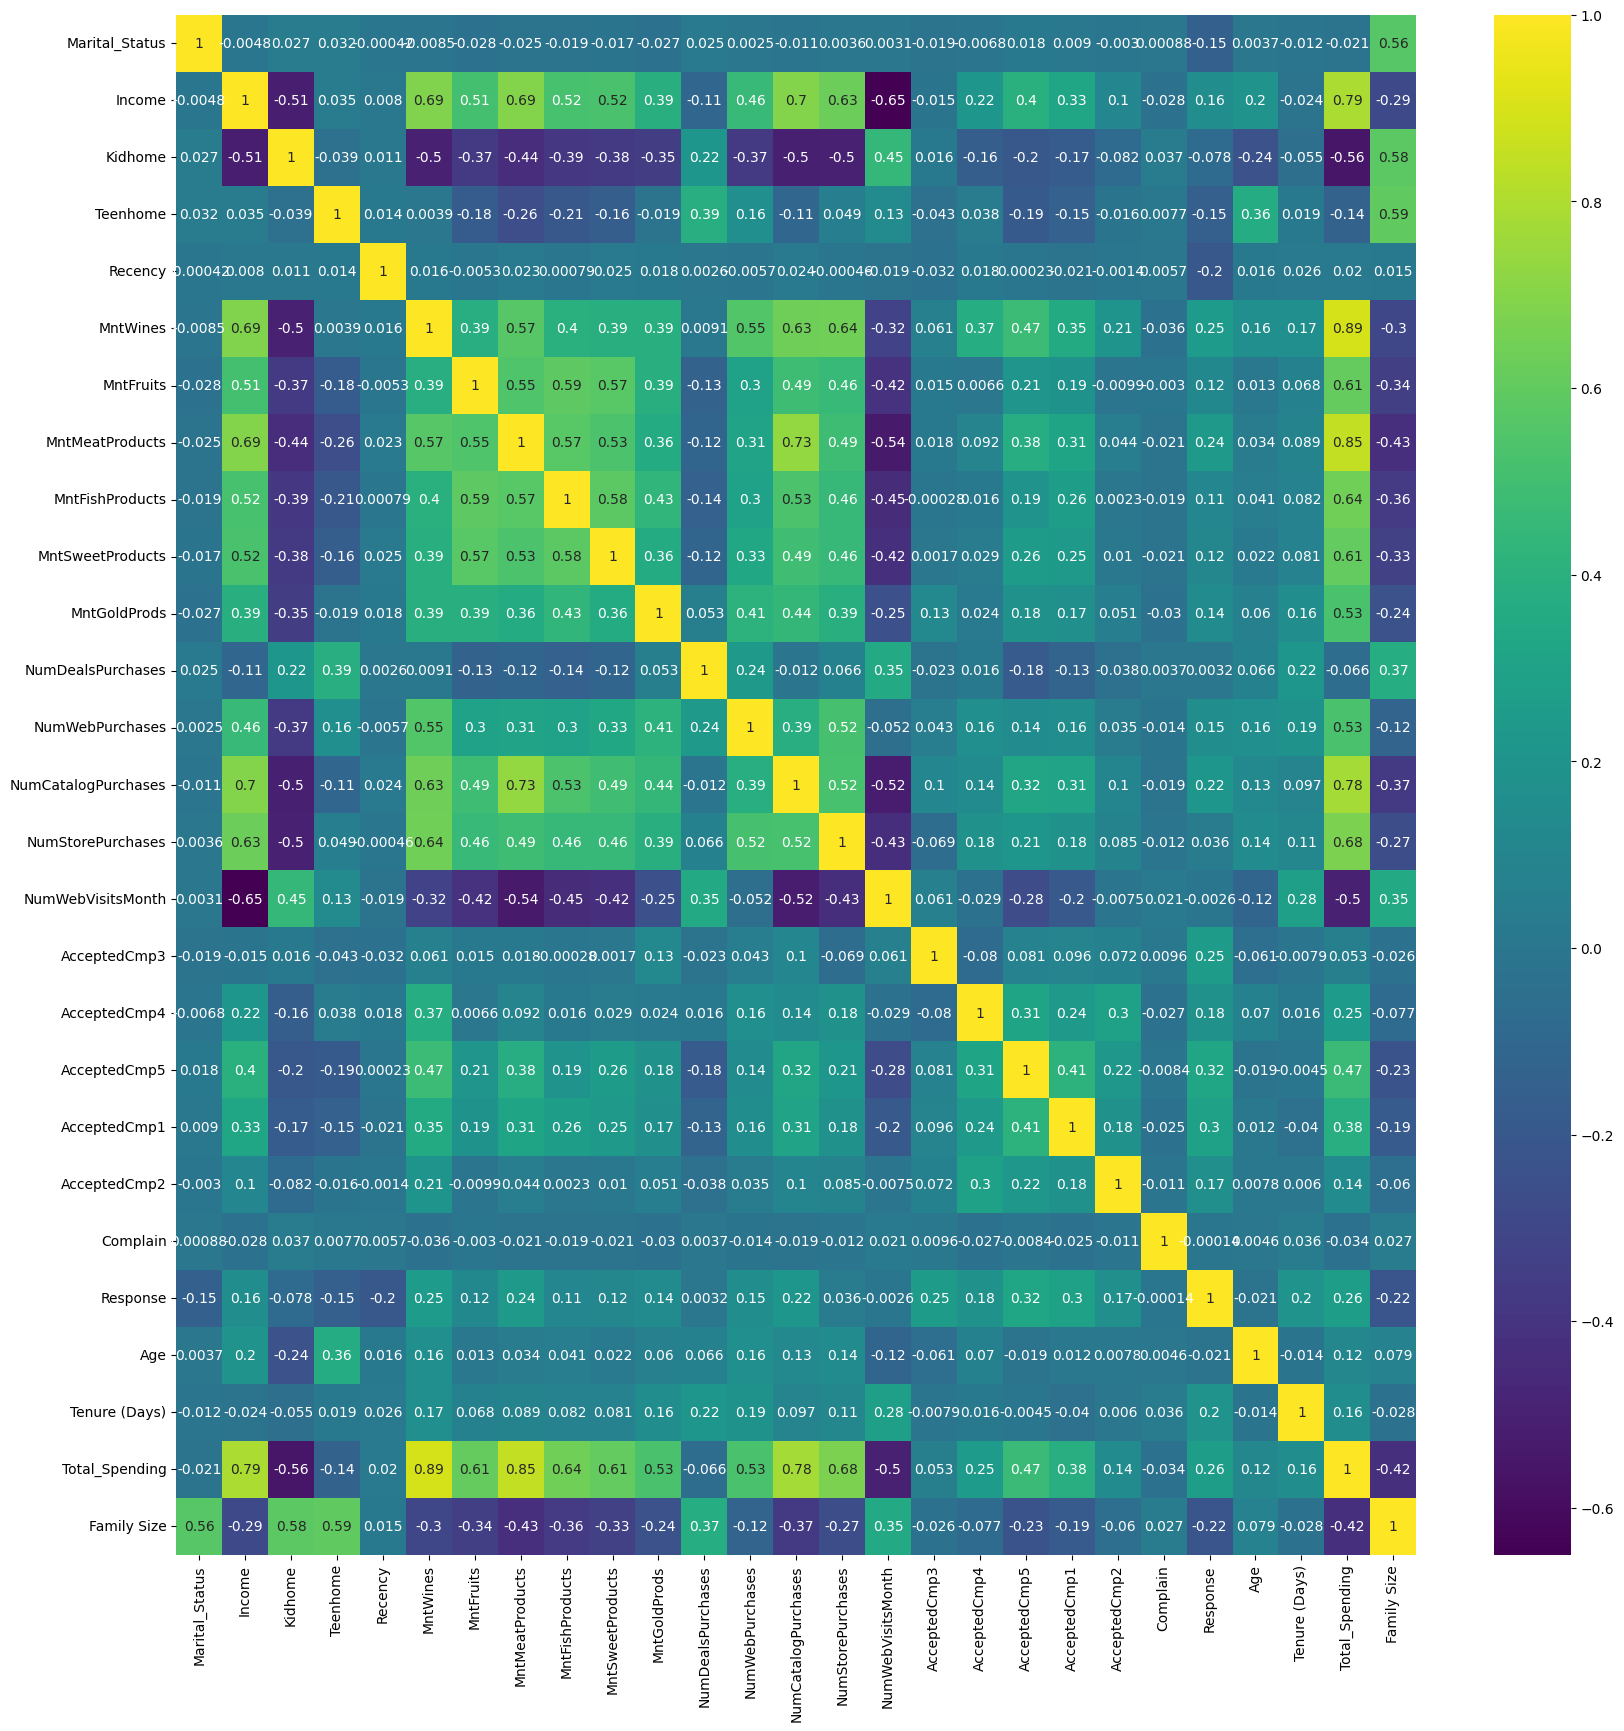

In [35]:
ndf=df.drop('Education',axis=1)
plt.figure(figsize=(20,20)) 
sns.heatmap(ndf.corr(),annot=True,cmap='viridis')

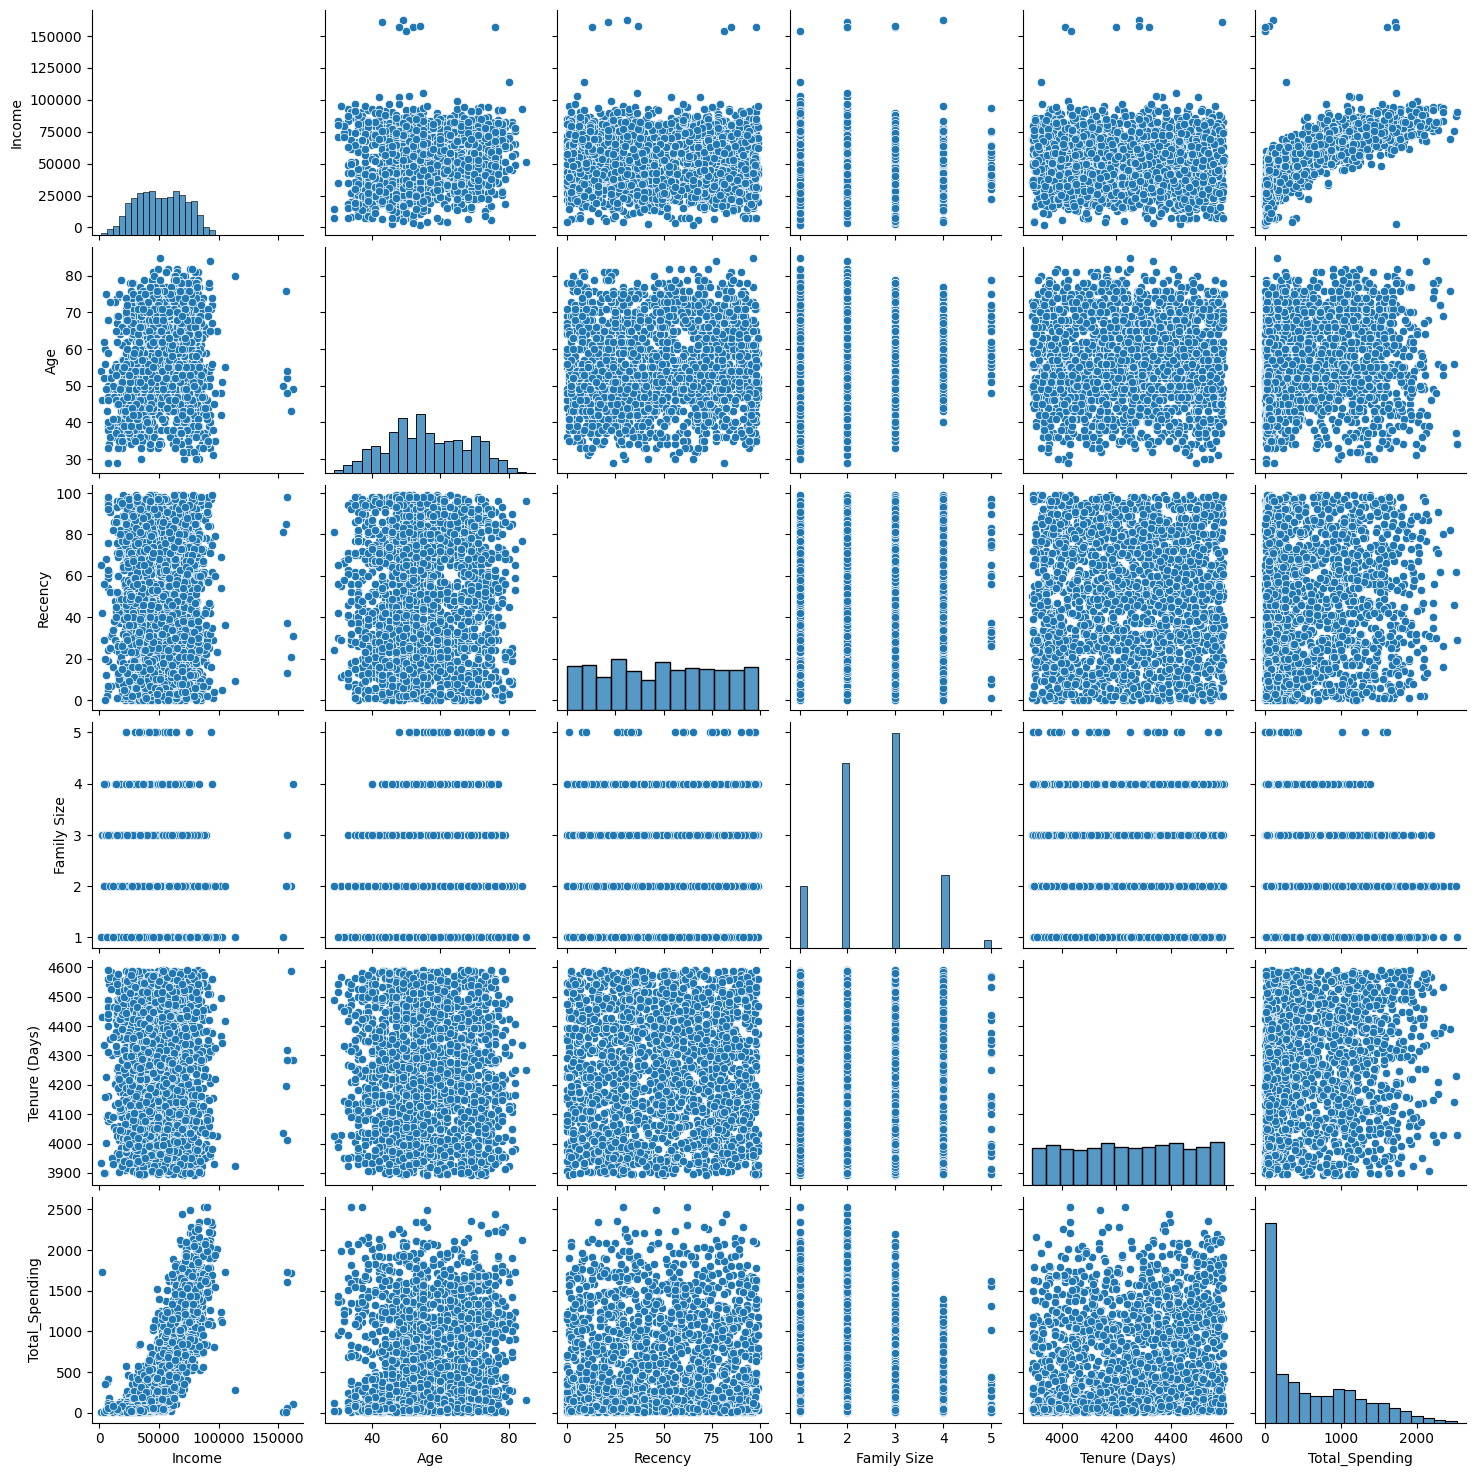

In [36]:
sns.pairplot(df[['Income','Age','Recency','Family Size','Tenure (Days)', 'Total_Spending']])

In [37]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age', 'Tenure (Days)', 'Total_Spending',
       'Family Size'],
      dtype='object')

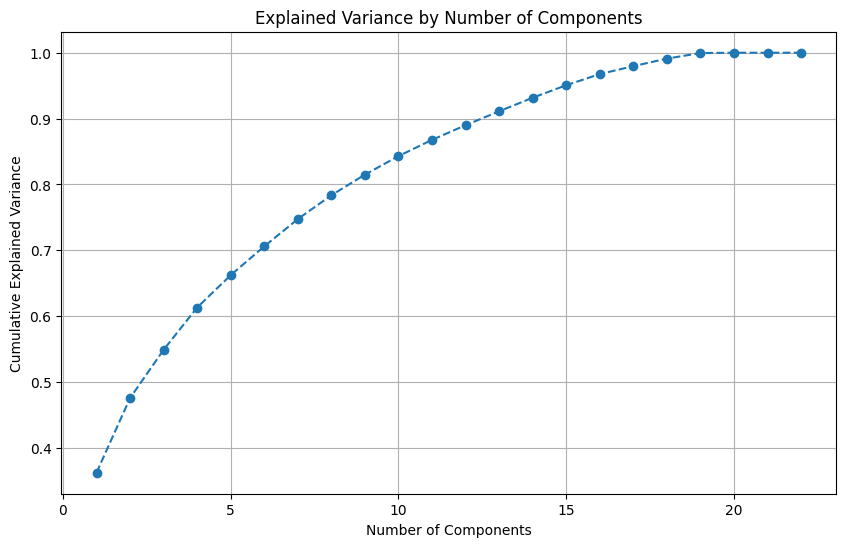

In [38]:
numerical_cols = ['Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Age', 'Tenure (Days)', 'Total_Spending',
       'Family Size']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numerical_cols])

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df[['Education']], drop_first=True)

# Combine scaled numerical and encoded categorical features
df_preprocessed = np.hstack((df_scaled, df_encoded.values))

# Step 2: Apply PCA
pca = PCA()
pca_components = pca.fit_transform(df_preprocessed)

# Plot explained variance to choose components
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), 
         np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.grid(True)
plt.show()

# Step 3: Choose Components and Transform
# Select enough components to explain at least 80-90% of variance
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.9) + 1
pca = PCA(n_components=n_components)
df_pca = pca.fit_transform(df_preprocessed)


In [39]:
n_components

13

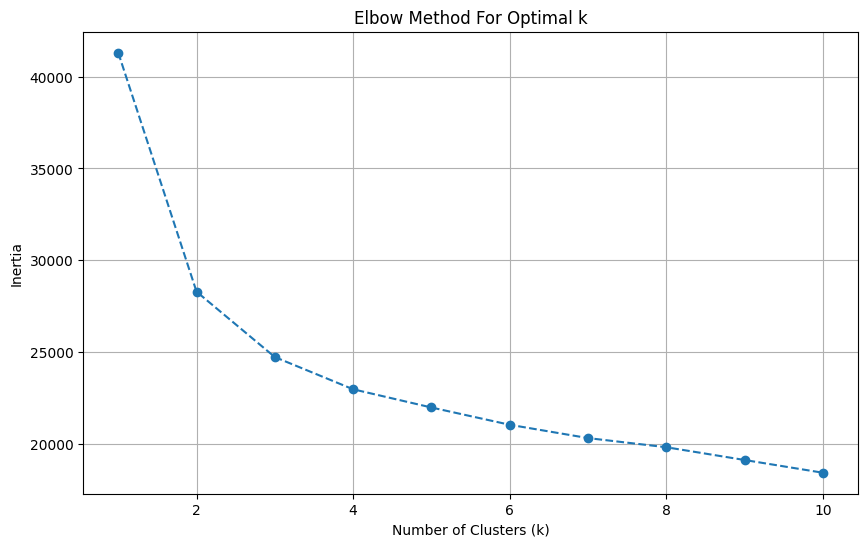

In [40]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

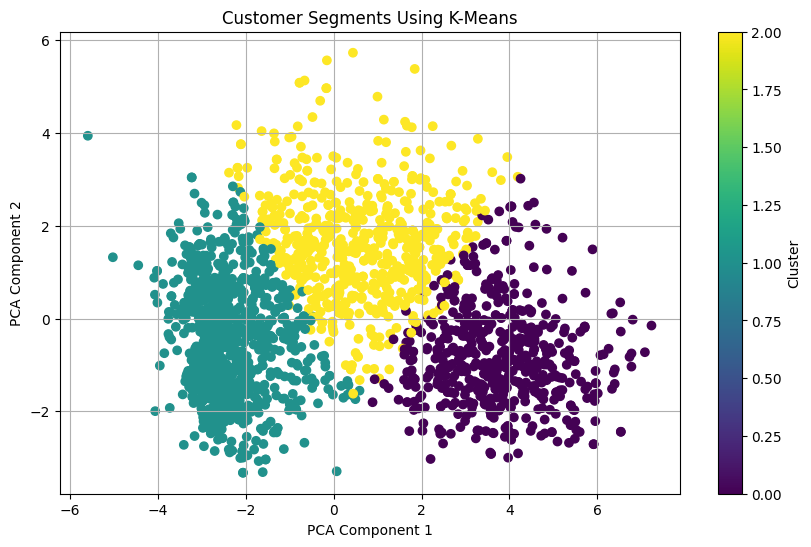

In [41]:
optimal_k = 3  # Adjust based on the elbow point
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(df_pca)

# Step 4: Visualize Clusters (Using First 2 PCA Components)
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Customer Segments Using K-Means')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [42]:
unique, counts = np.unique(clusters, return_counts=True)
cluster_counts = dict(zip(unique, counts))

# Display the counts
print("Number of datapoints in each cluster:", cluster_counts)

Number of datapoints in each cluster: {0: 560, 1: 1042, 2: 610}


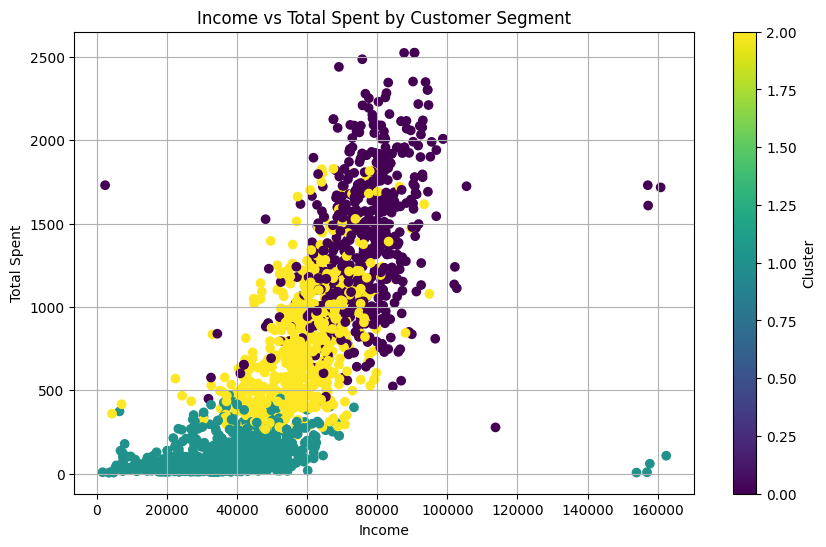

In [43]:
# Assuming 'Income' and 'Total_Spent' are the column names in the original dataframe

plt.figure(figsize=(10, 6))
plt.scatter(df['Income'], df['Total_Spending'], c=clusters, cmap='viridis')
plt.xlabel('Income')
plt.ylabel('Total Spent')
plt.title('Income vs Total Spent by Customer Segment')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


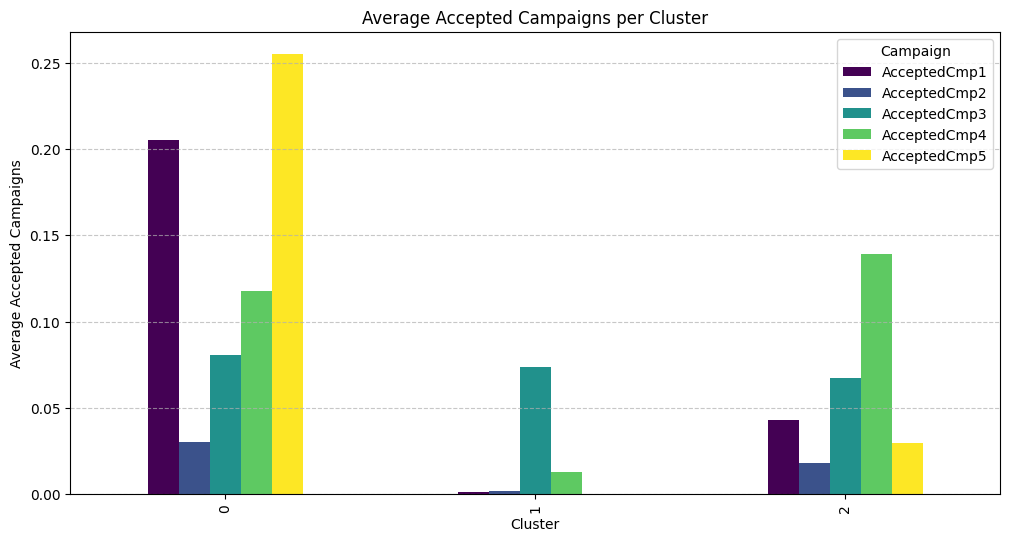

In [44]:
# List of Accepted Campaign columns
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

# Calculate mean of each campaign per cluster
campaign_means = df.groupby(clusters)[campaign_cols].mean()

# Plotting the bar chart
campaign_means.plot(kind='bar', figsize=(12, 6),cmap='viridis')
plt.xlabel('Cluster')
plt.ylabel('Average Accepted Campaigns')
plt.title('Average Accepted Campaigns per Cluster')
plt.legend(title='Campaign')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


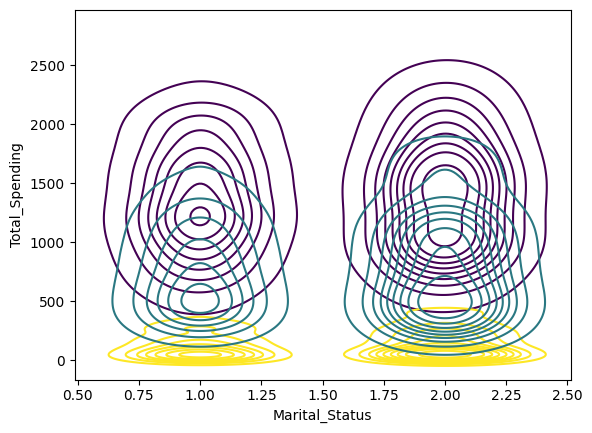

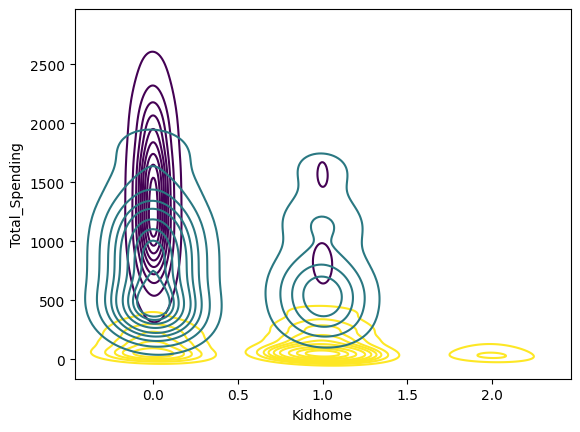

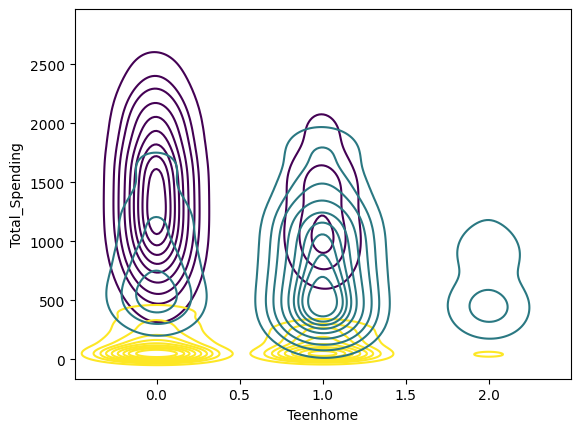

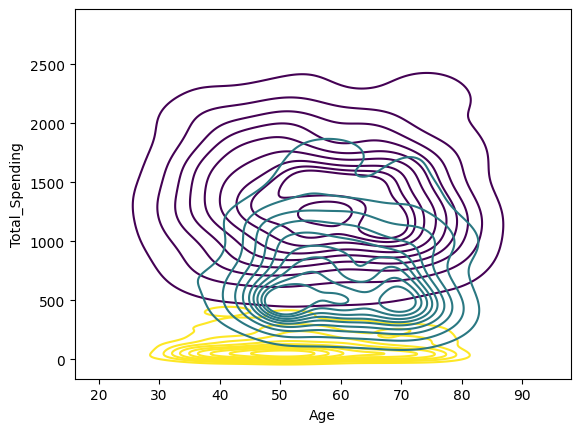

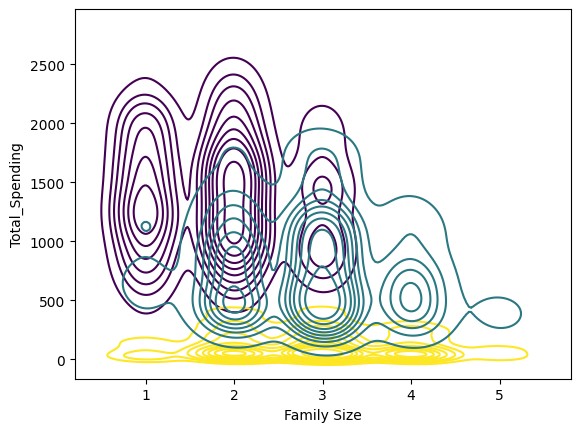

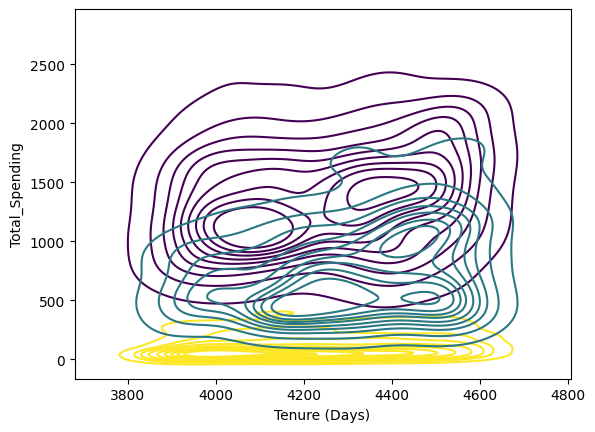

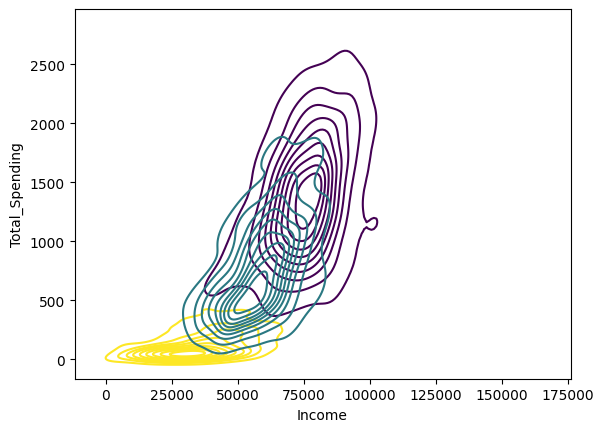

In [45]:
Personal = ['Marital_Status',"Kidhome","Teenhome","Age", "Family Size",'Tenure (Days)','Income']
custom_colors = {
    0: '#440154FF',
    1: '#FDE725FF',
    2: '#2A7882FF'
}

for i in Personal:
    plt.figure()
    unique_clusters = sorted(list(set(clusters)))

    for cluster in unique_clusters:
        subset = df[clusters == cluster]
        color = custom_colors.get(cluster)
        sns.kdeplot(x=subset[i], y=subset["Total_Spending"], color=color, label=cluster) #plot the kde plot with the specific color.
    plt.show()

In [46]:
# c0 - mostly no kids or teens,spans all ages, just couples, spends most and earns most
#c1 - have kids and teens, all ages, spends least and earns least
#c2 - have at max 1 kid/teen, relatively older,2-4 size, 